In [36]:
from datetime import datetime
import numpy as np            
import pandas as pd            
import matplotlib.pylab as plt 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

**Using Random data to test the trend baseline**

In [2]:
path = '/AAPL_2006-01-01_to_2018-01-01.csv'
df = pd.read_csv(path)
indexedDataset = df[['High']]
indexedDataset.head(5)

,High
0,10.68
1,10.85
2,10.70
3,10.96
4,11.03


Text(0, 0.5, 'Apple Stock High Value')

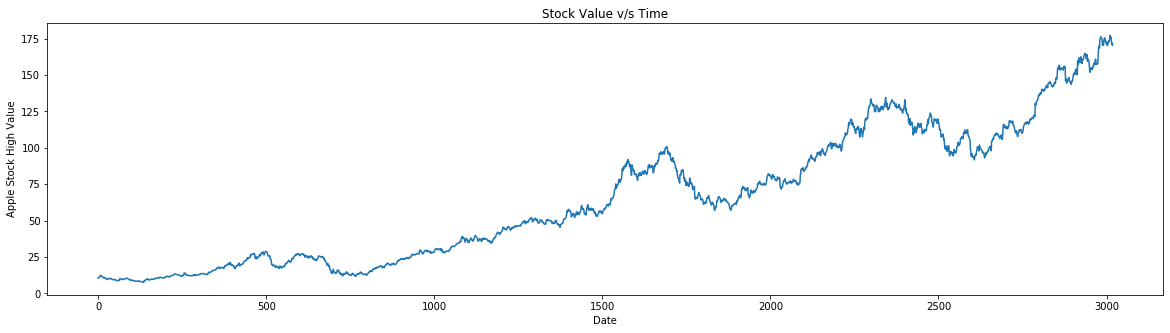

In [30]:

plt.figure(figsize=(20,5))
plt.plot(indexedDataset.values)
plt.title('Stock Value v/s Time')
plt.xlabel('Date')
plt.ylabel('Apple Stock High Value')

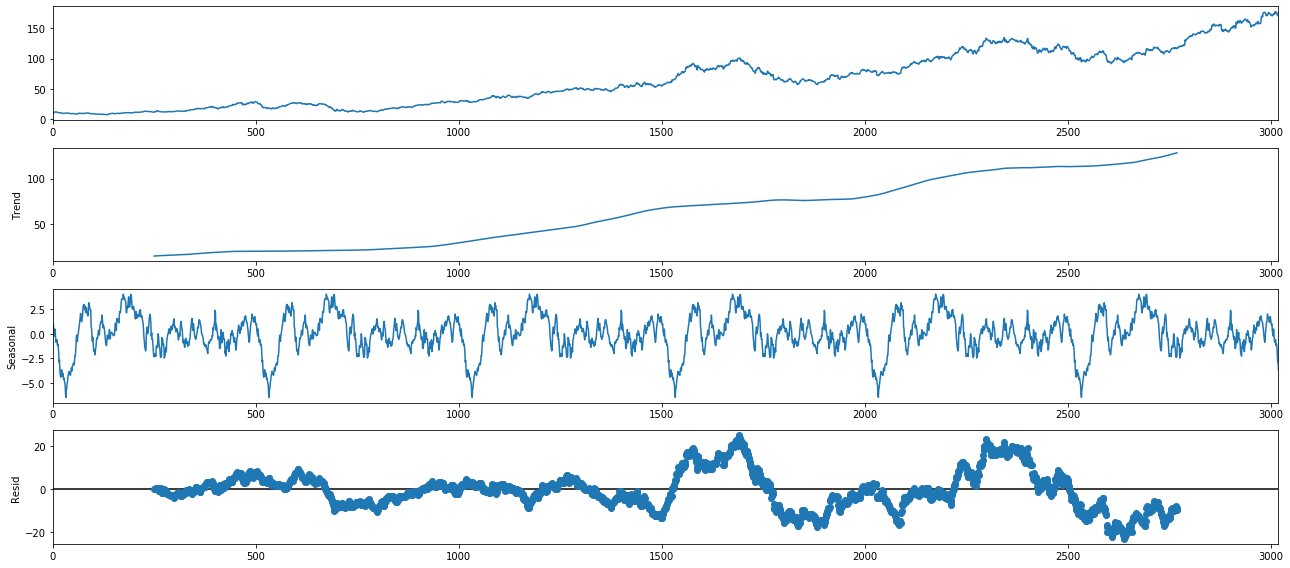

In [4]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(indexedDataset, model='additive',freq=500)
fig = decomposition.plot()
plt.show()

In [6]:
train = indexedDataset[0:2200]
test = indexedDataset[2200:]

In [8]:
rolmean = indexedDataset.rolling(window=2).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=2).std()
print(rolmean,rolstd)

High
0         NaN
1      10.765
2      10.775
3      10.830
4      10.995
...       ...
3014  175.720
3015  173.445
3016  171.125
3017  171.315
3018  171.220

[3019 rows x 1 columns]           High
0          NaN
1     0.120208
2     0.106066
3     0.183848
4     0.049497
...        ...
3014  0.424264
3015  2.793072
3016  0.487904
3017  0.756604
3018  0.890955

[3019 rows x 1 columns]


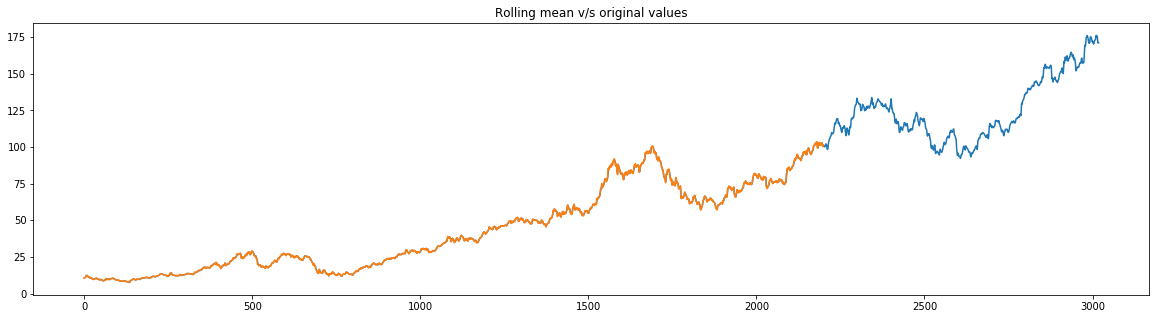

In [23]:
plt.figure(figsize=(20,5))
plt.title('Rolling mean v/s original values')
plt.plot(rolmean['High'].values)
plt.plot(train)
plt.show()

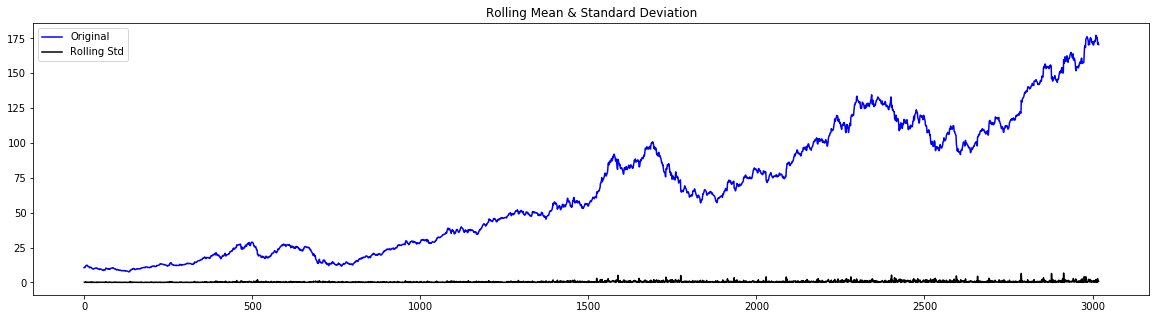

In [25]:
plt.figure(figsize=(20,5))
plt.title('Rolling std with original')
orig = plt.plot(indexedDataset, color='blue', label='Original')
# mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [26]:
df = indexedDataset.reset_index()
df.head()

,index,High
0,0,10.68
1,1,10.85
2,2,10.70
3,3,10.96
4,4,11.03


Text(0.5, 1.0, 'YoY Change in Stock Value v/s Time')

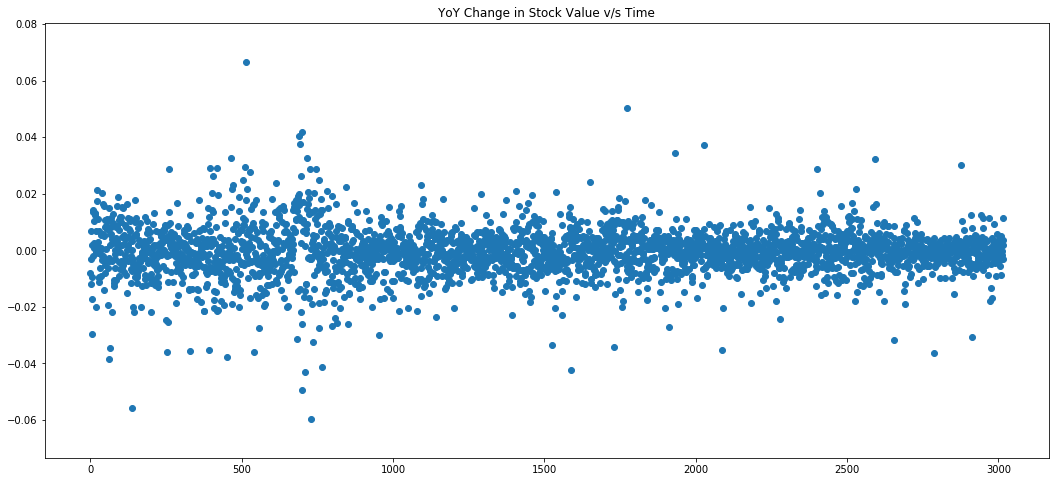

In [31]:
#Converting to consecutive change
df['dValues_num'] = df['High'] - df['High'].shift(-1)
df['dValues_den'] = df['High'] + df['High'].shift(-1)
df['dValues'] = df['dValues_num']/df['dValues_den']
df.drop(['High'],axis=1,inplace=True)
df.drop(df.tail(1).index,inplace=True)
plt.scatter(df.index,df.dValues.values)
plt.title('YoY Change in Stock Value v/s Time')

In [34]:
df.head()

,index,dValues_num,dValues_den,dValues
0,0,-0.17,21.53,-0.007896
1,1,0.15,21.55,0.006961
2,2,-0.26,21.66,-0.012004
3,3,-0.07,21.99,-0.003183
4,4,-0.67,22.73,-0.029476


In [52]:
# toggle='Normal'
toggle = 'YoY'

In [47]:
df = indexedDataset.reset_index()
df['dValues_num'] = df['High'] - df['High'].shift(-1)
df['dValues_den'] = df['High'] + df['High'].shift(-1)
df['dValues'] = df['dValues_num']/df['dValues_den']
df.head()

,index,High,dValues_num,dValues_den,dValues
0,0,10.68,-0.17,21.53,-0.007896
1,1,10.85,0.15,21.55,0.006961
2,2,10.70,-0.26,21.66,-0.012004
3,3,10.96,-0.07,21.99,-0.003183
4,4,11.03,-0.67,22.73,-0.029476


In [57]:
df = indexedDataset.reset_index()

if toggle == 'YoY':
    # df['dValues'] = df['High'] - df['High'].shift(-1)
    df['dValues_num'] = df['High'] - df['High'].shift(-1)
    df['dValues_den'] = df['High'] + df['High'].shift(-1)
    df['dValues'] = df['dValues_num']/df['dValues_den']
    #Just putting a scaling factor
    df['dValues'] *=100
    df.drop(['High'],axis=1,inplace=True)
    df.drop(['dValues_num'],axis=1,inplace=True)
    df.drop(['dValues_den'],axis=1,inplace=True)
    df.drop(df.tail(1).index,inplace=True)


df.columns = ['Year', 'Values']
df['Year'] = df['Year'].astype(int)
df['Values'] = df['Values'].astype(int)
X = df[['Year']]
y = df[['Values']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle = False)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# regressor = RandomForestClassifier(n_estimators=10)
# regressor.fit(X_train, y_train)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

y_pred = regressor.predict(X_test)

#Data Description
df['Values'].describe()

(2112, 1) (2112, 1) (906, 1) (906, 1)


count    3018.000000
mean       -0.023526
std         0.599782
min        -5.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: Values, dtype: float64

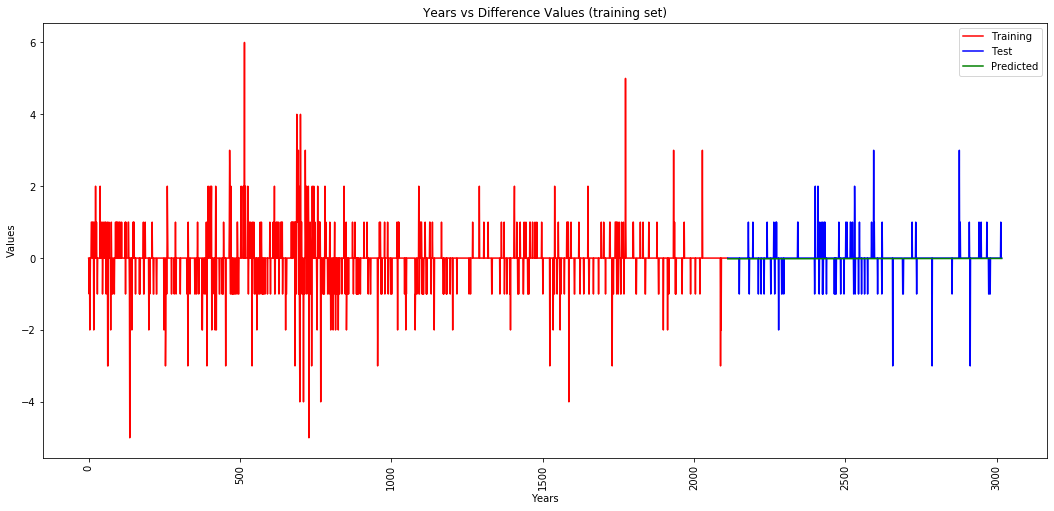

In [58]:
# plt.scatter(X_train, y_train, color = 'red')
# plt.plot(X_train, clf.predict(X_train), color = 'blue')
ax = plt.subplot(111)
ax.plot(X_train, y_train, color = 'red',label='Training')
ax.plot(X_test, y_test, color = 'blue',label = 'Test')
ax.plot(X_test, y_pred, color = 'green', label = 'Predicted')
plt.title('Years vs Difference Values (training set)')
plt.xlabel('Years')
ax.legend()

plt.xticks(rotation=90)
plt.ylabel('Values')
plt.show()

**Working with the consecutive difference instead of actual values**

**Working with real data**

In [62]:
df.head()

,year,Company,CIK,Revenue,NetIncomeLoss,Payments to acquire property
0,2011,AAPL,320193,1.082490e+11,25922000000,-4260000000
1,2012,AAPL,320193,1.565080e+11,41733000000,-8295000000
2,2013,AAPL,320193,1.709100e+11,37037000000,-8165000000
3,2014,AAPL,320193,1.827950e+11,39510000000,-9571000000
4,2015,AAPL,320193,2.337150e+11,53394000000,-11247000000


In [154]:
path = 'data/t.csv'
df = pd.read_csv(path)
indexedDataset = df[['year','Revenue']]
indexedDataset.head(5)

,year,Revenue
0,2011,1.267230e+11
1,2012,1.274340e+11
2,2013,1.287520e+11
3,2014,1.324470e+11
4,2015,1.468010e+11


Text(0, 0.5, 'Apple Stock  Value')

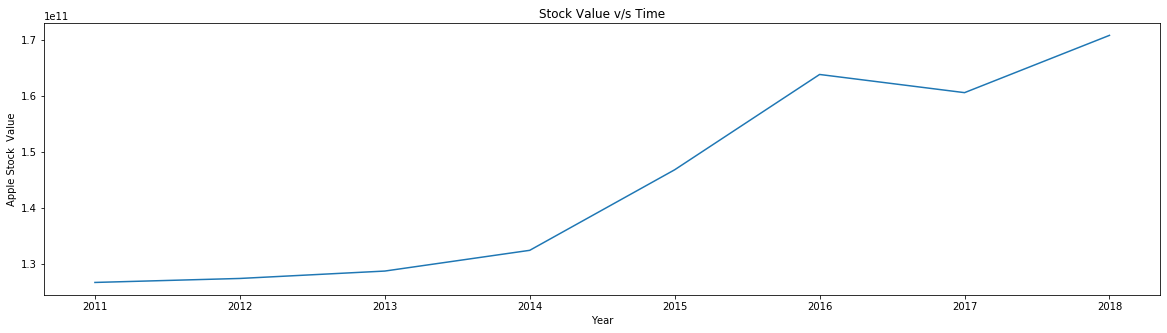

In [155]:
plt.figure(figsize=(20,5))
plt.plot(indexedDataset.year.values,indexedDataset.Revenue.values)
plt.title('Stock Value v/s Time')
plt.xlabel('Year')
plt.ylabel('Apple Stock  Value')

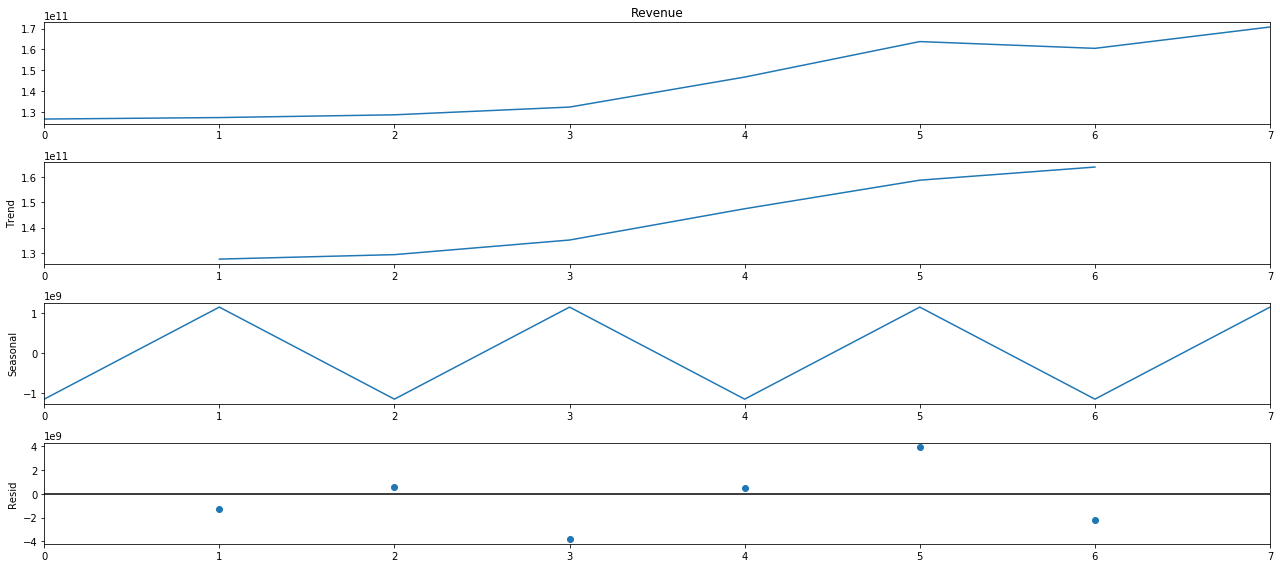

In [156]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(indexedDataset['Revenue'], model='additive',freq=2)
fig = decomposition.plot()
plt.show()

In [157]:
train = indexedDataset[0:6]
test = indexedDataset[6:]

In [158]:
rolmean = indexedDataset.rolling(window=2).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=2).std()
print(rolmean,rolstd)

year       Revenue
0     NaN           NaN
1  2011.5  1.270785e+11
2  2012.5  1.280930e+11
3  2013.5  1.305995e+11
4  2014.5  1.396240e+11
5  2015.5  1.552935e+11
6  2016.5  1.621660e+11
7  2017.5  1.656510e+11        year       Revenue
0       NaN           NaN
1  0.707107  5.027529e+08
2  0.707107  9.319667e+08
3  0.707107  2.612760e+09
4  0.707107  1.014981e+10
5  0.707107  1.201021e+10
6  0.707107  2.291026e+09
7  0.707107  7.219560e+09


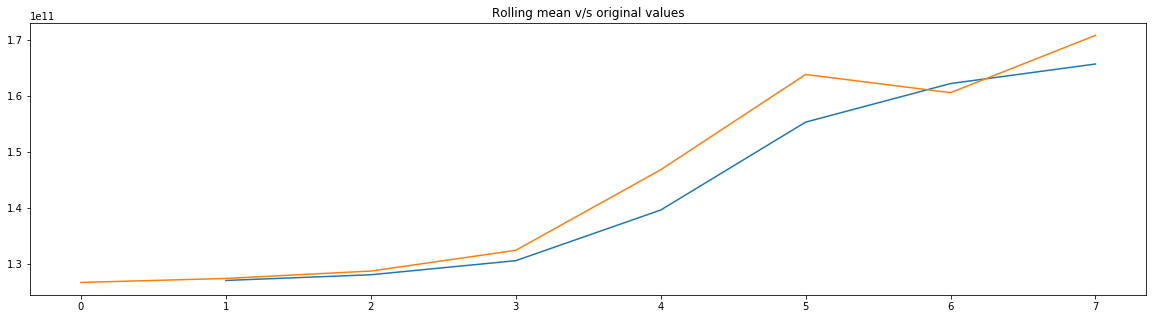

In [159]:
plt.figure(figsize=(20,5))
plt.title('Rolling mean v/s original values')
plt.plot(rolmean['Revenue'].values)
plt.plot(indexedDataset['Revenue'].values)
plt.show()

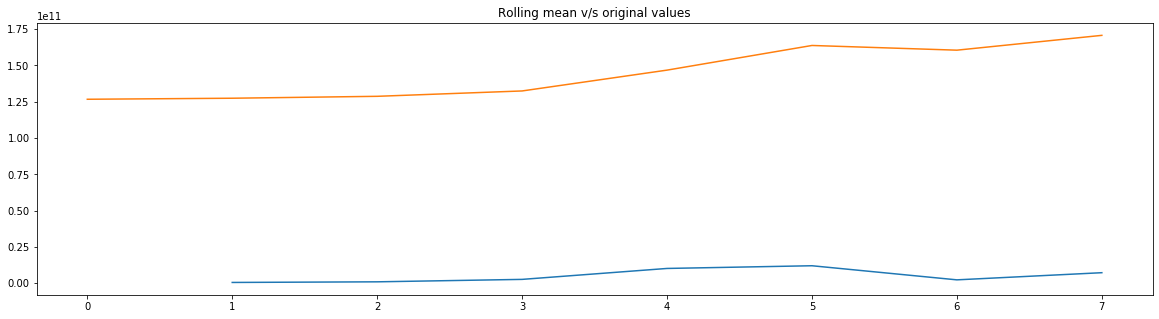

In [160]:
plt.figure(figsize=(20,5))
plt.title('Rolling mean v/s original values')
plt.plot(rolstd['Revenue'].values)
plt.plot(indexedDataset['Revenue'].values)
plt.show()

In [161]:
df = indexedDataset.reset_index()
df.drop(['index'],axis=1,inplace=True)
# df['dValues'] = df['Revenue'] - df['Revenue'].shift(-1)
# df.drop(['Revenue'],axis=1,inplace=True)
# df.drop(df.tail(1).index,inplace=True)
# df.head()

df.columns = ['Year', 'Values']
df['Year'] = df['Year'].astype(int)
df['Values'] = df['Values'].astype(int)
X = df[['Year']]
y = df[['Values']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle = False)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# regressor = RandomForestClassifier(n_estimators=10)
# regressor.fit(X_train, y_train)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

y_pred = regressor.predict(X_test)

#Data Description
df['Values'].describe()

(5, 1) (5, 1) (3, 1) (3, 1)


count    8.000000e+00
mean     1.446556e+11
std      1.822262e+10
min      1.267230e+11
25%      1.284225e+11
50%      1.396240e+11
75%      1.613560e+11
max      1.707560e+11
Name: Values, dtype: float64

In [93]:
df = indexedDataset.reset_index()
df.drop(['index'],axis=1,inplace=True)df.drop(['index'],axis=1,inplace=True)
df.head()

SyntaxError: invalid syntax (<ipython-input-93-153aacdd8276>, line 2)

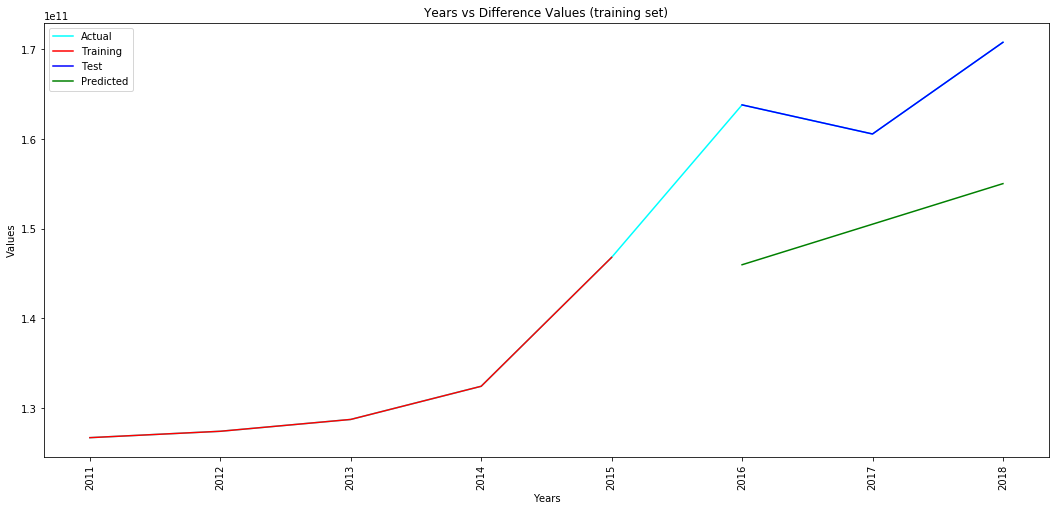

In [162]:
# plt.scatter(X_train, y_train, color = 'red')
# plt.plot(X_train, clf.predict(X_train), color = 'blue')
ax = plt.subplot(111)
ax.plot(df['Year'], df['Values'], color = 'cyan',label = 'Actual')
ax.plot(X_train, y_train, color = 'red',label='Training')
ax.plot(X_test, y_test, color = 'blue',label = 'Test')

ax.plot(X_test, y_pred, color = 'green', label = 'Predicted')
plt.title('Years vs Difference Values (training set)')
plt.xlabel('Years')
ax.legend()

plt.xticks(rotation=90)
plt.ylabel('Values')
plt.show()

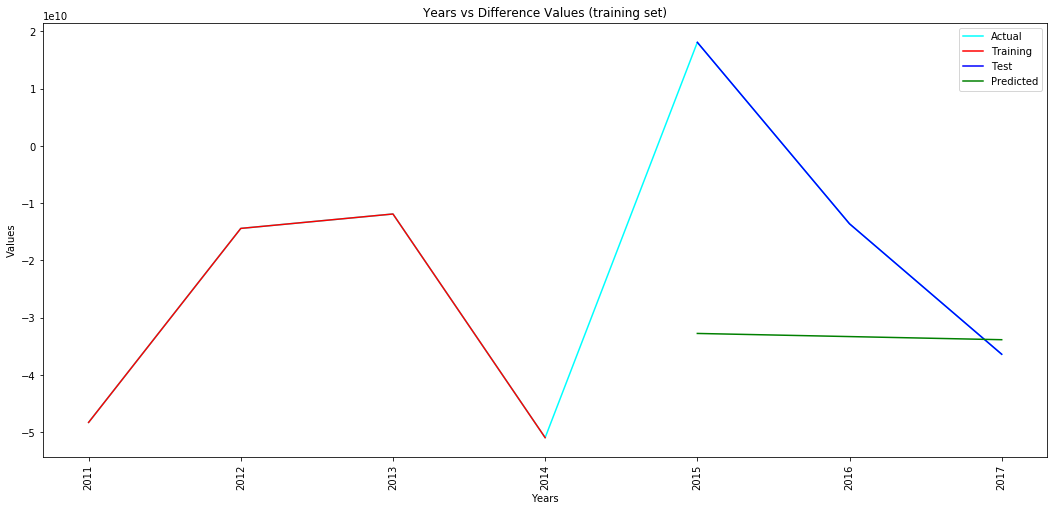

In [120]:
# plt.scatter(X_train, y_train, color = 'red')
# plt.plot(X_train, clf.predict(X_train), color = 'blue')
ax = plt.subplot(111)
ax.plot(df['Year'], df['Values'], color = 'cyan',label = 'Actual')
ax.plot(X_train, y_train, color = 'red',label='Training')
ax.plot(X_test, y_test, color = 'blue',label = 'Test')

ax.plot(X_test, y_pred, color = 'green', label = 'Predicted')
plt.title('Years vs Difference Values (training set)')
plt.xlabel('Years')
ax.legend()

plt.xticks(rotation=90)
plt.ylabel('Values')
plt.show()